# TASK 4

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the csv file

In [2]:
df = pd.read_csv("C:/Users/User/OneDrive/Desktop/INTERNSHIP/Projects/Task 4/data.csv", encoding="latin1")


In [3]:
df

,S.no,Statement,Status
0,1,oh my gosh,Anxiety
1,2,"trouble sleeping, confused mind, restless hear...",Anxiety
2,3,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,4,I've shifted my focus to something else but I'...,Anxiety
4,5,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
995,996,"still admire, even though it doesn't have the ...",Normal
996,997,The kite has flown. Wait pigeons can help right?,Normal
997,998,Can you wash it?,Normal
998,999,Is there anything I can leave for my day's sna...,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   S.no       1000 non-null   int64 
 1   Statement  1000 non-null   object
 2   Status     1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [5]:
df.shape

(1000, 3)

## Exploratory Data Analysis

In [6]:
df.isnull().sum()
# to check for any null values in the dataset

S.no         0
Statement    0
Status       0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
# to convert the string values into binary
encoder = LabelEncoder()
df['Status'] = encoder.fit_transform(df['Status'])

In [8]:
df

,S.no,Statement,Status
0,1,oh my gosh,0
1,2,"trouble sleeping, confused mind, restless hear...",0
2,3,"All wrong, back off dear, forward doubt. Stay ...",0
3,4,I've shifted my focus to something else but I'...,0
4,5,"I'm restless and restless, it's been a month n...",0
...,...,...,...
995,996,"still admire, even though it doesn't have the ...",1
996,997,The kite has flown. Wait pigeons can help right?,1
997,998,Can you wash it?,1
998,999,Is there anything I can leave for my day's sna...,1


In [9]:
df.describe()

,S.no,Status
count,1000.000000,1000.000000
mean,500.500000,0.600000
std,288.819436,0.490143
min,1.000000,0.000000
25%,250.750000,0.000000
50%,500.500000,1.000000
75%,750.250000,1.000000
max,1000.000000,1.000000


## Importing Packages

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [11]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_

True

## Data Pre-Processing

In [12]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    # to tokenize the text
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # to remove the words
    lemmatizer = WordNetLemmatizer()
    # to lemmantize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    # to join the tokens back into a string
    return processed_text
    
df['Statement'] = df['Statement'].apply(preprocess_text)
df

,S.no,Statement,Status
0,1,oh gosh,0
1,2,"trouble sleeping , confused mind , restless he...",0
2,3,"wrong , back dear , forward doubt . stay restl...",0
3,4,'ve shifted focus something else 'm still worried,0
4,5,"'m restless restless , 's month , boy . mean ?",0
...,...,...,...
995,996,"still admire , even though n't potential .",1
996,997,kite flown . wait pigeon help right ?,1
997,998,wash ?,1
998,999,anything leave day 's snack ?,1


## Model Implementation

In [13]:
analyzer = SentimentIntensityAnalyzer()
# to initialize the analyzer
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment
# creating function
df['sentiment'] = df['Statement'].apply(get_sentiment)
df

,S.no,Statement,Status,sentiment
0,1,oh gosh,0,0
1,2,"trouble sleeping , confused mind , restless he...",0,0
2,3,"wrong , back dear , forward doubt . stay restl...",0,1
3,4,'ve shifted focus something else 'm still worried,0,0
4,5,"'m restless restless , 's month , boy . mean ?",0,0
...,...,...,...,...
995,996,"still admire , even though n't potential .",1,1
996,997,kite flown . wait pigeon help right ?,1,1
997,998,wash ?,1,0
998,999,anything leave day 's snack ?,1,0


## Extracting Insights

In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df['Status'], df['sentiment']))

[[160 240]
 [245 355]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(df['Status'], df['sentiment']))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40       400
           1       0.60      0.59      0.59       600

    accuracy                           0.52      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.52      0.52      0.52      1000



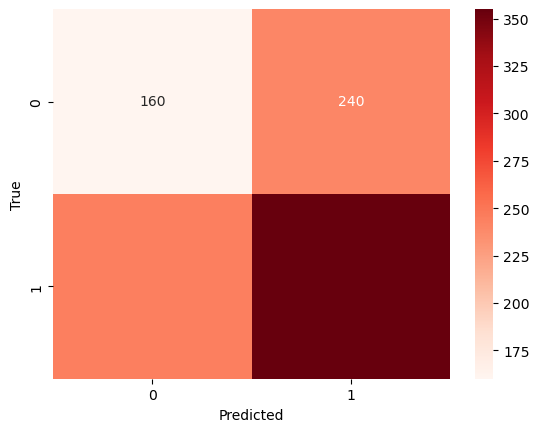

In [16]:
sns.heatmap(confusion_matrix(df['Status'], df['sentiment']), annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()